<a href="https://colab.research.google.com/github/Tejas-TA/Machine-Learning-Prediction-of-California-House-Prices/blob/main/California_Housing_Prices.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **California Housing Prices Prediction - Machine Learning**



### Exploratory Data Analysis (EDA)

In [2]:
import pandas as pd
df = pd.read_csv("housing.csv")

In [3]:
#Checking number of rows and columns (m*n)
df.shape

(20640, 10)

In [4]:
#25%, 75%, standard deviaiton etc are displayed for all features
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [5]:
#To check non-null count
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  int64  
 3   total_rooms         20640 non-null  int64  
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  int64  
 6   households          20640 non-null  int64  
 7   median_income       20640 non-null  float64
 8   ocean_proximity     20640 non-null  object 
 9   median_house_value  20640 non-null  int64  
dtypes: float64(4), int64(5), object(1)
memory usage: 1.6+ MB


In [6]:
#Using matplotlib and seaborn for visualization
import matplotlib.pyplot as plt
import seaborn as sns

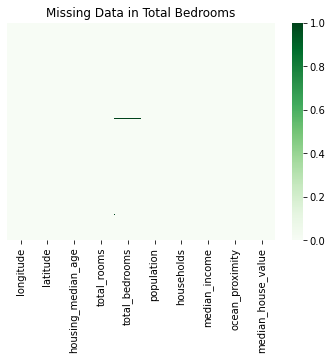

In [7]:
#Visualizing missing data
sns.heatmap(df.isnull(),cmap='Greens',cbar=True,yticklabels=False)
plt.title('Missing Data in Total Bedrooms')
plt.show()

In [8]:
#Checking as to which feature has missing values using boolean commands
df.isnull().any()

longitude             False
latitude              False
housing_median_age    False
total_rooms           False
total_bedrooms         True
population            False
households            False
median_income         False
ocean_proximity       False
median_house_value    False
dtype: bool

In [9]:
#So, total_bedrooms has missing values
#Counting how many rows do not have bedrooms 
df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
ocean_proximity         0
median_house_value      0
dtype: int64

<b>We have 207 missing values for 'total_bedrooms' which will be handled during the next phase

### Data Cleaning, Visualization, Feature Engineering and Selection

In [10]:
#Another version of df.head() but without feature names
df.values

array([[-122.23, 37.88, 41, ..., 8.3252, 'NEAR BAY', 452600],
       [-122.22, 37.86, 21, ..., 8.3014, 'NEAR BAY', 358500],
       [-122.24, 37.85, 52, ..., 7.2574, 'NEAR BAY', 352100],
       ...,
       [-121.22, 39.43, 17, ..., 1.7, 'INLAND', 92300],
       [-121.32, 39.43, 18, ..., 1.8672, 'INLAND', 84700],
       [-121.24, 39.37, 16, ..., 2.3886, 'INLAND', 89400]], dtype=object)

In [11]:
# Shuffling all rows(frac=1)
df = df.sample(frac=1)
df.head(10)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
16830,-122.54,37.62,35,1481,277.0,747,254,4.4286,NEAR OCEAN,262100
13455,-117.39,34.11,5,2987,457.0,1821,485,4.8889,INLAND,138900
3925,-118.56,34.18,36,1366,224.0,719,270,4.8264,<1H OCEAN,251000
5077,-118.29,33.98,44,2261,555.0,1348,455,1.9125,<1H OCEAN,97200
13694,-117.23,34.13,10,1145,293.0,726,251,1.6450,INLAND,68700
18227,-122.09,37.41,14,753,193.0,421,153,4.2463,NEAR BAY,266700
49,-122.27,37.82,40,946,375.0,700,352,1.7750,NEAR BAY,112500
7504,-118.27,33.92,35,1818,374.0,1444,372,2.7450,<1H OCEAN,106800
16063,-122.48,37.75,52,2515,494.0,1583,477,4.3393,NEAR BAY,317600
18487,-121.58,37.01,15,2873,547.0,1582,567,5.1519,INLAND,264700


In [12]:
#Categorical Data, so, will enumerate and replace all data with unique values for each type of data
df['ocean_proximity'].unique()

array(['NEAR OCEAN', 'INLAND', '<1H OCEAN', 'NEAR BAY', 'ISLAND'],
      dtype=object)

[]

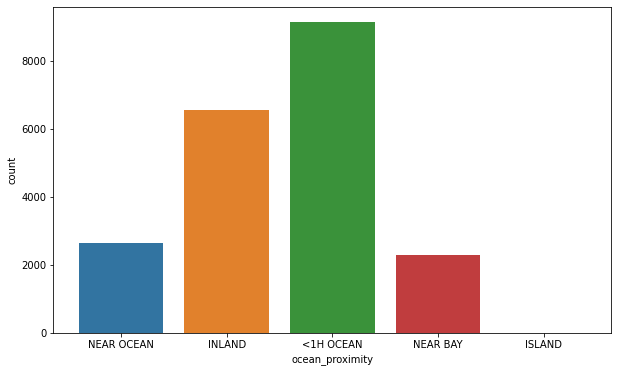

In [13]:
plt.figure(figsize=(10,6))
sns.countplot(data=df,x='ocean_proximity')
plt.plot()

In [14]:
# Replace ocean proximity with values to help our model
ocean_proximity = {a:b for b,a in enumerate(df['ocean_proximity'].unique())}
df.replace(ocean_proximity, inplace=True)

In [15]:
df.ocean_proximity.unique()

array([0, 1, 2, 3, 4])

In [16]:
# The feature 'total_bedrooms' has NaN values so I will replace them with the mean of the feature
df = df.apply(lambda x: x.fillna(x.mean()))

In [17]:
#Run this cell to check if mean values are populated into the csv. 
#Note that data frame has been shuffled
#new=df.to_csv("total_bedrooms".csv")

In [18]:
#Verifying Data is balanced
df.isnull().any()

longitude             False
latitude              False
housing_median_age    False
total_rooms           False
total_bedrooms        False
population            False
households            False
median_income         False
ocean_proximity       False
median_house_value    False
dtype: bool

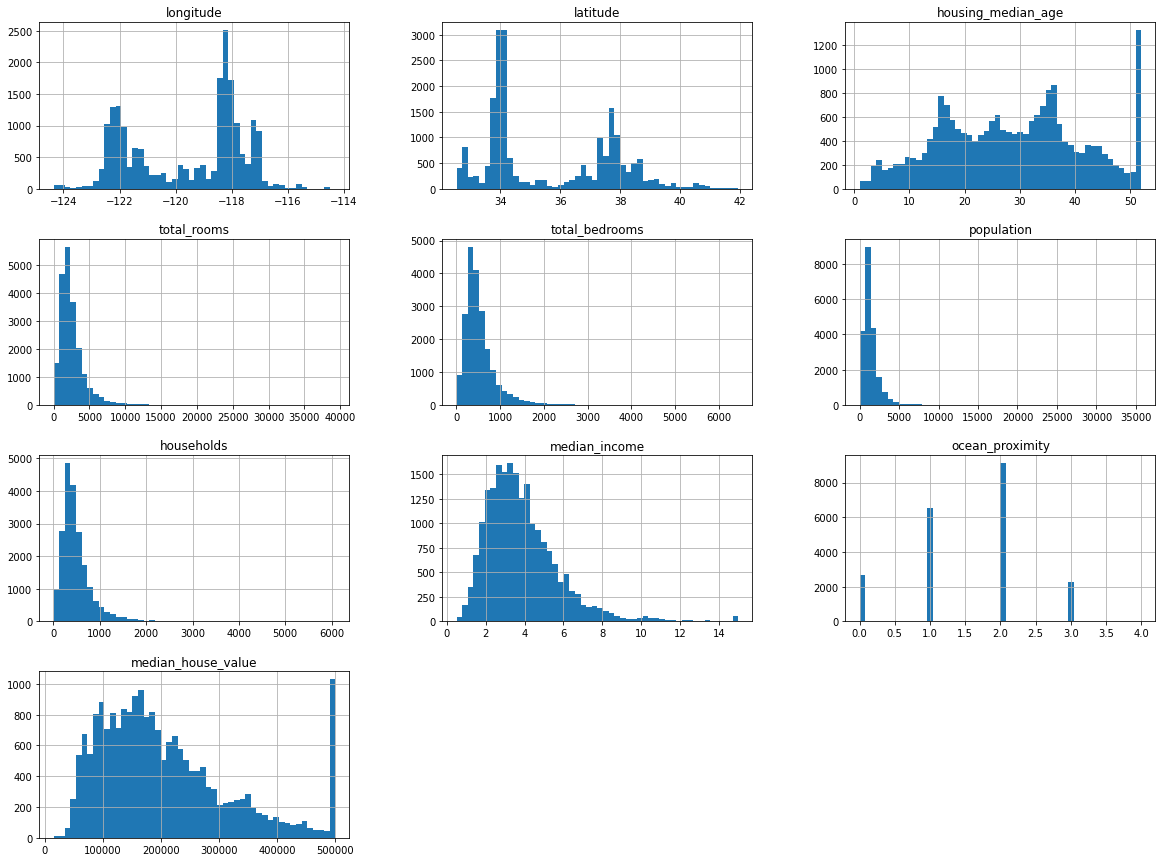

In [19]:
import matplotlib.pyplot as plt
df.hist(bins=50,figsize=(20,15))
plt.show()

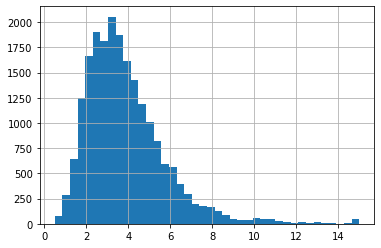

In [20]:
#Analyzing the median income range
df["median_income"].hist(bins=40)

In [21]:
# Calculating correlation
corr_matrix=df.corr()
corr_matrix

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
longitude,1.000000,-0.924664,-0.108197,0.044568,0.069260,0.099773,0.055310,-0.015176,-0.179531,-0.045967
latitude,-0.924664,1.000000,0.011173,-0.036100,-0.066658,-0.108785,-0.071035,-0.079809,0.066080,-0.144160
housing_median_age,-0.108197,0.011173,1.000000,-0.361262,-0.318998,-0.296244,-0.302916,-0.119034,0.206445,0.105623
total_rooms,0.044568,-0.036100,-0.361262,1.000000,0.927253,0.857126,0.918484,0.198050,-0.015509,0.134153
total_bedrooms,0.069260,-0.066658,-0.318998,0.927253,1.000000,0.873910,0.974725,-0.007682,-0.004458,0.049454
population,0.099773,-0.108785,-0.296244,0.857126,0.873910,1.000000,0.907222,0.004834,0.007563,-0.024650
households,0.055310,-0.071035,-0.302916,0.918484,0.974725,0.907222,1.000000,0.013033,0.016085,0.065843
median_income,-0.015176,-0.079809,-0.119034,0.198050,-0.007682,0.004834,0.013033,1.000000,0.128302,0.688075
ocean_proximity,-0.179531,0.066080,0.206445,-0.015509,-0.004458,0.007563,0.016085,0.128302,1.000000,0.212746
median_house_value,-0.045967,-0.144160,0.105623,0.134153,0.049454,-0.024650,0.065843,0.688075,0.212746,1.000000


<Figure size 720x432 with 0 Axes>

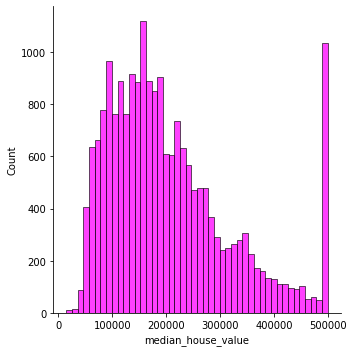

In [22]:
plt.figure(figsize=(10,6))
sns.displot(df['median_house_value'],color='magenta')
plt.show()

As we see from above data, house values > 500000 are outliers, so we remove them

In [23]:
df[df['median_house_value']>450000]['median_house_value'].value_counts().head()

500001    965
500000     27
475000      8
483300      6
466700      4
Name: median_house_value, dtype: int64

In [24]:
df=df.loc[df['median_house_value']<500001,:]

In [25]:
df=df[df['population']<25000]

<Figure size 1008x576 with 0 Axes>

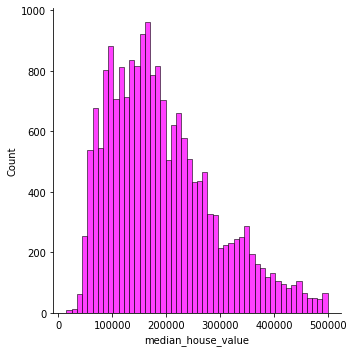

In [26]:
plt.figure(figsize=(14,8))
sns.displot(df['median_house_value'],color='magenta')
plt.show()

<b>The outliers of median house value >500000 are removed

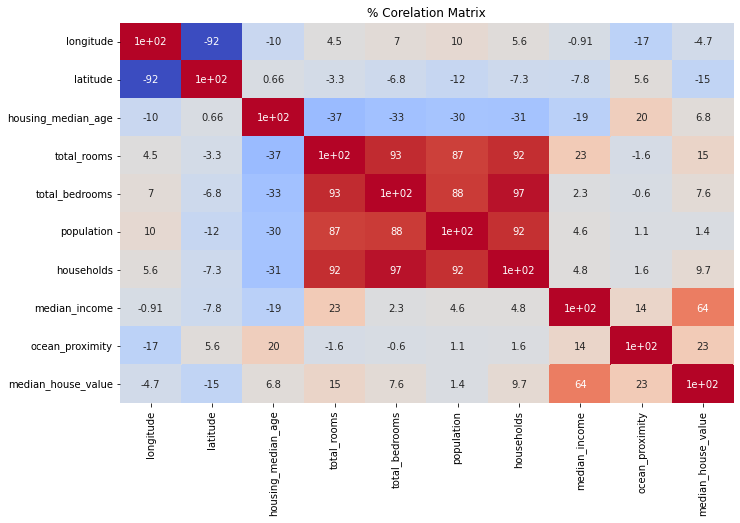

In [27]:
plt.figure(figsize=(11,7))
sns.heatmap(cbar=False,annot=True,data=df.corr()*100,cmap='coolwarm')
plt.title('% Corelation Matrix')
plt.show()

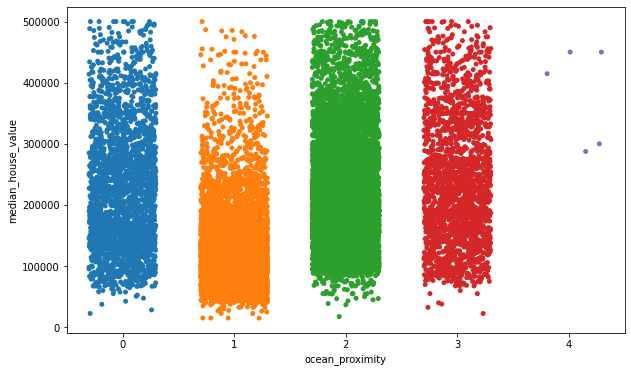

In [28]:
plt.figure(figsize=(10,6))
sns.stripplot(data=df,x='ocean_proximity',y='median_house_value',jitter=0.3)

[]

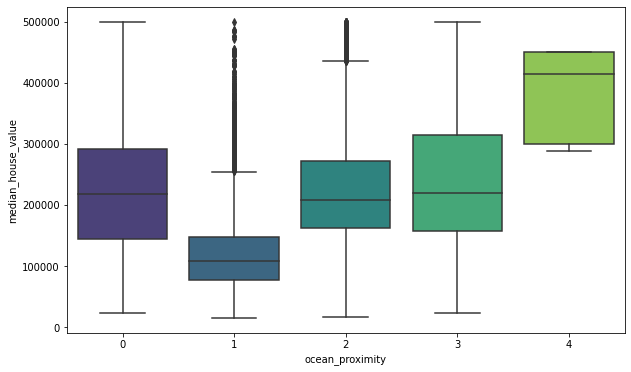

In [29]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df,x='ocean_proximity',y='median_house_value',palette='viridis')
plt.plot()

### Modelling and Evaluation

In [30]:
X = df.drop('median_house_value',axis=1)
y = df['median_house_value']

In [31]:
X.head(10)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
16830,-122.54,37.62,35,1481,277.0,747,254,4.4286,0
13455,-117.39,34.11,5,2987,457.0,1821,485,4.8889,1
3925,-118.56,34.18,36,1366,224.0,719,270,4.8264,2
5077,-118.29,33.98,44,2261,555.0,1348,455,1.9125,2
13694,-117.23,34.13,10,1145,293.0,726,251,1.6450,1
18227,-122.09,37.41,14,753,193.0,421,153,4.2463,3
49,-122.27,37.82,40,946,375.0,700,352,1.7750,3
7504,-118.27,33.92,35,1818,374.0,1444,372,2.7450,2
16063,-122.48,37.75,52,2515,494.0,1583,477,4.3393,3
18487,-121.58,37.01,15,2873,547.0,1582,567,5.1519,1


In [32]:
X.shape

(19673, 9)

In [33]:
y.head(10)

16830    262100
13455    138900
3925     251000
5077      97200
13694     68700
18227    266700
49       112500
7504     106800
16063    317600
18487    264700
Name: median_house_value, dtype: int64

In [34]:
y.shape

(19673,)

In [35]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.6)

In [36]:
print("X_train shape is ",X_train.shape)
print("X_test shape is ",X_test.shape)
print("y_train shape is ",y_train.shape)
print("y_test shape is ",y_test.shape)

X_train shape is  (11803, 9)
X_test shape is  (7870, 9)
y_train shape is  (11803,)
y_test shape is  (7870,)


### 1. Random Forest Regressor

In [37]:
#Using this class to make my print statement look bold
class color:
    BOLD = '\033[1m'

In [38]:
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
import numpy as np

rf = RandomForestRegressor(random_state=0)
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)

accuracies = {}

accuracy = rf.score(X_test, y_test)
accuracy_rounded = round(accuracy*100,2)
accuracies['Random Forest'] = accuracy_rounded

r2 = metrics.r2_score(y_test, y_pred)
Adj_r2 = 1-(1-r2)*(9-1)/(9-1-1)

print(color.BOLD + '\nR2 score is ',r2)

print(color.BOLD + '\nAdjusted R2 score is ',Adj_r2)

print(color.BOLD + '\nMean Absolute Error is',round(metrics.mean_absolute_error(y_test,rf.predict(X_test)),2))

print(color.BOLD + '\nMean Squared Error is',round(metrics.mean_squared_error(y_test,rf.predict(X_test)),2))

print(color.BOLD + '\nRoot Mean Squared Error is',round(np.sqrt(mean_squared_error(y_test,rf.predict(X_test))),2))

print(color.BOLD + "\nAccuracy of Random Forest Regressor is ", accuracy_rounded,'%')


R2 score is  0.7719696074905423

Adjusted R2 score is  0.7393938371320483

Mean Absolute Error is 31506.07

Mean Squared Error is 2194682756.69

Root Mean Squared Error is 46847.44

Accuracy of Random Forest Regressor is  77.2 %


### 2. Decision Tree Regressor

In [39]:
from sklearn.tree import DecisionTreeRegressor

dt = DecisionTreeRegressor(random_state=42)
dt.fit(X_train,y_train)

y_pred = dt.predict(X_test)

accuracy = dt.score(X_test, y_test)
accuracy_rounded = round(accuracy*100,2)
accuracies['Decision Tree'] = accuracy_rounded

r2 = metrics.r2_score(y_test, y_pred)
Adj_r2 = 1-(1-r2)*(9-1)/(9-1-1)

print(color.BOLD + '\nR2 score is ',r2)

print(color.BOLD + '\nAdjusted R2 score is ',Adj_r2)

print(color.BOLD + '\nMean Absolute Error is',round(metrics.mean_absolute_error(y_test,dt.predict(X_test)),2))

print(color.BOLD + '\nMean Squared Error is',round(metrics.mean_squared_error(y_test,dt.predict(X_test)),2))

print(color.BOLD + '\nRoot Mean Squared Error is',round(np.sqrt(metrics.mean_squared_error(y_test,dt.predict(X_test))),2))

print(color.BOLD + "\nAccuracy of Decision Tree Regressor is ", accuracy_rounded,'%')


R2 score is  0.5599979849410713

Adjusted R2 score is  0.4971405542183672

Mean Absolute Error is 43503.0

Mean Squared Error is 4234807583.02

Root Mean Squared Error is 65075.4

Accuracy of Decision Tree Regressor is  56.0 %


### 4. XGBoost Regressor

In [40]:
from xgboost import XGBRegressor
from sklearn.metrics import accuracy_score

xg = XGBRegressor()
xg.fit(X_train,y_train)

y_pred = xg.predict(X_test)

accuracy = xg.score(X_test, y_test)
accuracy_rounded = round(accuracy*100,2)
accuracies['XGBoost'] = accuracy_rounded

r2 = metrics.r2_score(y_test, y_pred)
Adj_r2 = 1-(1-r2)*(9-1)/(9-1-1)

print(color.BOLD + '\nR2 score is ',r2)

print(color.BOLD + '\nAdjusted R2 score is ',Adj_r2)

print(color.BOLD + '\nMean Absolute Error is',round(metrics.mean_absolute_error(y_test,xg.predict(X_test)),2))

print(color.BOLD + '\nMean Squared Error is',round(metrics.mean_squared_error(y_test,xg.predict(X_test)),2))

print(color.BOLD + '\nRoot Mean Squared Error is',round(np.sqrt(mean_squared_error(y_test,xg.predict(X_test))),2))

print(color.BOLD + "\nAccuracy of XGBoost Regressor is ", accuracy_rounded,'%')

[06:10:35] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.

R2 score is  0.7280181471991933

Adjusted R2 score is  0.6891635967990781

Mean Absolute Error is 36177.01

Mean Squared Error is 2617694404.27

Root Mean Squared Error is 51163.41

Accuracy of XGBoost Regressor is  72.8 %


### 5. Gradient Boost Regressor

In [41]:
from sklearn.ensemble import GradientBoostingRegressor

gboost = GradientBoostingRegressor(random_state=42)

gboost.fit(X_train,y_train)

y_pred = gboost.predict(X_test)

accuracy = gboost.score(X_test, y_test)
accuracy_rounded = round(accuracy*100,2)
accuracies['Gradient Boost'] = accuracy_rounded

r2 = metrics.r2_score(y_test, y_pred)
Adj_r2 = 1-(1-r2)*(9-1)/(9-1-1)

print(color.BOLD + '\nR2 score is ',r2)

print(color.BOLD + '\nAdjusted R2 score is ',Adj_r2)

print(color.BOLD + '\nMean Absolute Error is',round(metrics.mean_absolute_error(y_test,gboost.predict(X_test)),2))

print(color.BOLD + '\nMean Squared Error is',round(metrics.mean_squared_error(y_test,gboost.predict(X_test)),2))

print(color.BOLD + '\nRoot Mean Squared Error is',round(np.sqrt(mean_squared_error(y_test,gboost.predict(X_test))),2))

print(color.BOLD + "\nAccuracy of Gradient Boost Regressor is ", accuracy_rounded,'%')


R2 score is  0.7269824340782831

Adjusted R2 score is  0.687979924660895

Mean Absolute Error is 36237.69

Mean Squared Error is 2627662644.48

Root Mean Squared Error is 51260.73

Accuracy of Gradient Boost Regressor is  72.7 %


In [42]:
from sklearn.linear_model import Ridge

rid = Ridge(alpha=0.1)

rid.fit(X_train,y_train)

y_pred = rid.predict(X_test)

accuracy = rid.score(X_test, y_test)
accuracy_rounded = round(accuracy*100,2)
accuracies['Ridge Regression'] = accuracy_rounded

r2 = metrics.r2_score(y_test, y_pred)
Adj_r2 = 1-(1-r2)*(9-1)/(9-1-1)

print(color.BOLD + '\nR2 score is ',r2)

print(color.BOLD + '\nAdjusted R2 score is ',Adj_r2)

print(color.BOLD + '\nMean Absolute Error is',round(metrics.mean_absolute_error(y_test,rid.predict(X_test)),2))

print(color.BOLD + '\nMean Squared Error is',round(metrics.mean_squared_error(y_test,rid.predict(X_test)),2))

print(color.BOLD + '\nRoot Mean Squared Error is',round(np.sqrt(mean_squared_error(y_test,rid.predict(X_test))),2))

print(color.BOLD + "\nAccuracy of Ridge Regression is ", accuracy_rounded,'%')


R2 score is  0.6055338150739438

Adjusted R2 score is  0.54918150294165

Mean Absolute Error is 45657.58

Mean Squared Error is 3796547138.42

Root Mean Squared Error is 61616.13

Accuracy of Ridge Regression is  60.55 %


In [43]:
from sklearn import linear_model

lasso = linear_model.Lasso(alpha=0.3)

lasso.fit(X_train,y_train)

y_pred = lasso.predict(X_test)

accuracy = lasso.score(X_test, y_test)
accuracy_rounded = round(accuracy*100,2)
accuracies['Lasso Regression'] = accuracy_rounded

r2 = metrics.r2_score(y_test, y_pred)
Adj_r2 = 1-(1-r2)*(9-1)/(9-1-1)

print(color.BOLD + '\nR2 score is ',r2)

print(color.BOLD + '\nAdjusted R2 score is ',Adj_r2)

print(color.BOLD + '\nMean Absolute Error is',round(metrics.mean_absolute_error(y_test,lasso.predict(X_test)),2))

print(color.BOLD + '\nMean Squared Error is',round(metrics.mean_squared_error(y_test,lasso.predict(X_test)),2))

print(color.BOLD + '\nRoot Mean Squared Error is',round(np.sqrt(mean_squared_error(y_test,lasso.predict(X_test))),2))

print(color.BOLD + "\nAccuracy of Lasso Regression is ", accuracy_rounded,'%')


R2 score is  0.6055337054490619

Adjusted R2 score is  0.5491813776560708

Mean Absolute Error is 45657.59

Mean Squared Error is 3796548193.51

Root Mean Squared Error is 61616.14

Accuracy of Lasso Regression is  60.55 %


### 9. CatBoost

In [44]:
!pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 76.6 MB 75 kB/s 


In [45]:
from catboost import CatBoostRegressor

cat = CatBoostRegressor()

cat.fit(X_train,y_train)

y_pred = cat.predict(X_test)

accuracy = cat.score(X_test, y_test)
accuracy_rounded = round(accuracy*100,2)
accuracies['CatBoost'] = accuracy_rounded

r2 = metrics.r2_score(y_test, y_pred)
Adj_r2 = 1-(1-r2)*(9-1)/(9-1-1)

print(color.BOLD + '\nR2 score is ',r2)

print(color.BOLD + '\nAdjusted R2 score is ',Adj_r2)

print(color.BOLD + '\nMean Absolute Error is',round(metrics.mean_absolute_error(y_test,cat.predict(X_test)),2))

print(color.BOLD + '\nMean Squared Error is',round(metrics.mean_squared_error(y_test,cat.predict(X_test)),2))

print(color.BOLD + '\nRoot Mean Squared Error is',round(np.sqrt(mean_squared_error(y_test,cat.predict(X_test))),2))

print(color.BOLD + "\nAccuracy of CatBoost is ", accuracy_rounded,'%')

Learning rate set to 0.060472
0:	learn: 94473.1388666	total: 52.1ms	remaining: 52.1s
1:	learn: 91651.3523844	total: 56.4ms	remaining: 28.1s
2:	learn: 88901.0835577	total: 60.3ms	remaining: 20.1s
3:	learn: 86640.0316417	total: 64.2ms	remaining: 16s
4:	learn: 84387.6545189	total: 68.2ms	remaining: 13.6s
5:	learn: 82279.1062996	total: 72.2ms	remaining: 12s
6:	learn: 80536.6765474	total: 76ms	remaining: 10.8s
7:	learn: 78733.5999916	total: 80.1ms	remaining: 9.93s
8:	learn: 77165.5504030	total: 83.9ms	remaining: 9.24s
9:	learn: 75728.1031843	total: 88.1ms	remaining: 8.72s
10:	learn: 74428.7109040	total: 93.4ms	remaining: 8.4s
11:	learn: 73326.8266258	total: 101ms	remaining: 8.36s
12:	learn: 72214.5989164	total: 105ms	remaining: 8.01s
13:	learn: 71122.7257596	total: 110ms	remaining: 7.73s
14:	learn: 70130.9958352	total: 114ms	remaining: 7.49s
15:	learn: 69148.4532842	total: 118ms	remaining: 7.26s
16:	learn: 68300.2414444	total: 122ms	remaining: 7.06s
17:	learn: 67505.2168492	total: 126ms	rem

In [47]:
#Verifying how untuned models predict house value
print('\nPrediction of Random Forest is ',rf.predict([[-122.22,37.86,21,7099,1106,2401,1138,8.3014,0]])) 
print('\nPrediction of Gradient Boost is ',gboost.predict([[-122.22,37.86,21,7099,1106,2401,1138,8.3014,0]]))
print('\nPrediction of Decision Tree is ',dt.predict([[-122.22,37.86,21,7099,1106,2401,1138,8.3014,0]]))
print('\nPrediction of CatBoost is ',cat.predict([[-122.22,37.86,21,7099,1106,2401,1138,8.3014,0]]))


Prediction of Random Forest is  [376417.]

Prediction of Gradient Boost is  [421964.30529119]

Prediction of Decision Tree is  [358500.]

Prediction of CatBoost is  [452690.60484372]


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  "X does not have valid feature names, but"


### All accuracies together

In [48]:
accuracies

{'Random Forest': 77.2,
 'Decision Tree': 56.0,
 'XGBoost': 72.8,
 'Gradient Boost': 72.7,
 'Ridge Regression': 60.55,
 'Lasso Regression': 60.55,
 'CatBoost': 81.42}

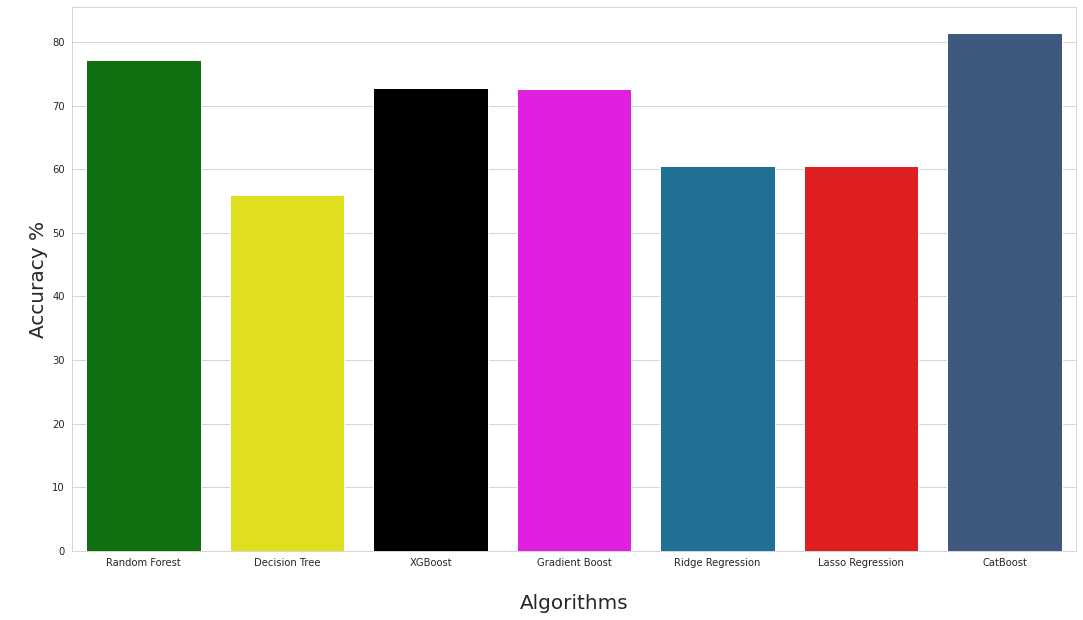

In [49]:
#Plotting accuracies of all the models
colors = ["green", "yellow", "black", "magenta", "#0e76a8", "red", "#34558b","#f0daa4","#3b3d4b","#fd823e"]

sns.set_style("whitegrid")
plt.figure(figsize=(18,10))
plt.yticks(np.arange(0,100,10))
plt.ylabel("\nAccuracy %",fontsize=20)
plt.xlabel("\nAlgorithms",fontsize=20)
sns.barplot(x=list(accuracies.keys()), y=list(accuracies.values()), palette=colors)
plt.show()

In [50]:
#CatBoost performs the best without tuning.

### Hyperparameter Tuning


> Let's try to increase the accuracy of the top performing models on this dataset - 

> 1.   RandomForest
2.   CatBoost
1.   LightGBM

---



In [51]:
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
import numpy as np

### Random Forest Tuning

In [52]:
#Randomized Search CV

# Number of trees in the random forest
n_estimators = [int(x) for x in np.linspace(start = 5, stop = 300, num = 6)]

# Number of features to consider at every split
max_features = ['auto', 'sqrt', 'log2']

# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 120, num = 12)]
max_depth.append(None)

# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 13, 16]

# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4, 8]

# Method of selecting samples for training each tree
bootstrap = [True, False]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}


print(random_grid)

{'n_estimators': [5, 64, 123, 182, 241, 300], 'max_features': ['auto', 'sqrt', 'log2'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, None], 'min_samples_split': [2, 5, 10, 13, 16], 'min_samples_leaf': [1, 2, 4, 8], 'bootstrap': [True, False]}


In [53]:
rf_random = RandomizedSearchCV(estimator = rf, 
                               param_distributions = random_grid, 
                               n_iter = 9, 
                               cv = 4, 
                               verbose=0,
                               random_state=42, 
                               n_jobs = -1)

In [54]:
rf_random.fit(X_train, y_train)

RandomizedSearchCV(cv=4, estimator=RandomForestRegressor(random_state=0),
                   n_iter=9, n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110, 120,
                                                      None],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 4, 8],
                                        'min_samples_split': [2, 5, 10, 13, 16],
                                        'n_estimators': [5, 64, 123, 182, 241,
                                                         300]},
                   random_state=42)

In [55]:
rf_random.best_params_

{'n_estimators': 64,
 'min_samples_split': 2,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': 20,
 'bootstrap': False}

In [56]:
#Predict on test data
y_pred = rf_random.predict(X_test)

#Metrics Calculation
r2 = round(metrics.r2_score(y_test, y_pred),2)
Adj_r2 = round(1-(1-r2)*(9-1)/(9-1-1),2)

#Display results
print(color.BOLD + '\nR2 score is ',r2)

print(color.BOLD + '\nAdjusted R2 score is ',Adj_r2)

print(color.BOLD + '\nMean Absolute Error is',round(metrics.mean_absolute_error(y_test,rf_random.predict(X_test)),2))

print(color.BOLD + '\nMean Squared Error is',round(metrics.mean_squared_error(y_test,rf_random.predict(X_test)),2))

print(color.BOLD + '\nRoot Mean Squared Error is',round(np.sqrt(mean_squared_error(y_test,rf_random.predict(X_test))),2))


R2 score is  0.79

Adjusted R2 score is  0.76

Mean Absolute Error is 30348.97

Mean Squared Error is 2035561568.05

Root Mean Squared Error is 45117.2


In [57]:
#Grid Search CV

param_grid = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [4, 8, 10],
    'n_estimators': [100, 200, 300]
}

# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, cv = 2, n_jobs = -1, verbose = 0)

grid_search.fit(X_train,y_train)

grid_search.best_params_

{'bootstrap': True,
 'max_depth': 80,
 'max_features': 3,
 'min_samples_leaf': 3,
 'min_samples_split': 4,
 'n_estimators': 300}

In [58]:
best_grid = grid_search.best_estimator_
best_grid

RandomForestRegressor(max_depth=80, max_features=3, min_samples_leaf=3,
                      min_samples_split=4, n_estimators=300, random_state=0)

In [59]:
#Predict on test data
y_pred = best_grid.predict(X_test)

#Metrics Calculation
r2 = round(metrics.r2_score(y_test, y_pred),2)
Adj_r2 = round(1-(1-r2)*(9-1)/(9-1-1),2)

#Display results
print(color.BOLD + '\nR2 score is ',r2)

print(color.BOLD + '\nAdjusted R2 score is ',Adj_r2)

print(color.BOLD + '\nMean Absolute Error is',round(metrics.mean_absolute_error(y_test,rf_random.predict(X_test)),2))

print(color.BOLD + '\nMean Squared Error is',round(metrics.mean_squared_error(y_test,rf_random.predict(X_test)),2))

print(color.BOLD + '\nRoot Mean Squared Error is',round(np.sqrt(mean_squared_error(y_test,rf_random.predict(X_test))),2))


R2 score is  0.78

Adjusted R2 score is  0.75

Mean Absolute Error is 30348.97

Mean Squared Error is 2035561568.05

Root Mean Squared Error is 45117.2


### CatBoost Tuning

In [60]:
#Randomized Search CV
n_estimators = [int(x) for x in np.linspace(start = 5 , stop = 150, num = 2)]

max_depth = [int(x) for x in np.linspace(2, 120, num = 2)] 

max_depth.append(None)

grid = {'n_estimators': n_estimators, 'learning_rate' : np.linspace(0,0.3,5)}

print(grid)

{'n_estimators': [5, 150], 'learning_rate': array([0.   , 0.075, 0.15 , 0.225, 0.3  ])}


In [61]:
rscv = RandomizedSearchCV(      estimator=cat, 
                                param_distributions=grid, 
                                n_iter = 10, 
                                scoring='r2',
                                cv = 5, 
                                verbose=0, 
                                random_state=42,
                                n_jobs=-1,
                                return_train_score=True)

rscv.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
10 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/catboost/core.py", line 5593, in fit
    save_snapshot, snapshot_file, snapshot_interval, init_model, callbacks, log_cout, log_cerr)
  File "/usr/local/lib/python3.7/dist-packages/catboost/core.py", line 2270, in _fit
    callbacks=callbacks
  File "/usr/local/lib/python

0:	learn: 83709.1875358	total: 5.63ms	remaining: 839ms
1:	learn: 74834.3829413	total: 10.5ms	remaining: 775ms
2:	learn: 69497.5214748	total: 14.8ms	remaining: 725ms
3:	learn: 65750.7296263	total: 18.9ms	remaining: 689ms
4:	learn: 63334.6053087	total: 22.9ms	remaining: 663ms
5:	learn: 61244.4779568	total: 26.9ms	remaining: 645ms
6:	learn: 59466.0360261	total: 30.8ms	remaining: 630ms
7:	learn: 58507.5202138	total: 34.7ms	remaining: 616ms
8:	learn: 57170.3289713	total: 38.5ms	remaining: 603ms
9:	learn: 56303.2400267	total: 42.4ms	remaining: 594ms
10:	learn: 55447.9246018	total: 46.4ms	remaining: 587ms
11:	learn: 54577.5297590	total: 50.6ms	remaining: 582ms
12:	learn: 54014.2708147	total: 54.8ms	remaining: 577ms
13:	learn: 53746.2888508	total: 58.8ms	remaining: 572ms
14:	learn: 52890.7326509	total: 69.7ms	remaining: 628ms
15:	learn: 52380.0969180	total: 73.6ms	remaining: 616ms
16:	learn: 51838.5277018	total: 78.8ms	remaining: 616ms
17:	learn: 51485.6135116	total: 82.7ms	remaining: 606ms
18

RandomizedSearchCV(cv=5,
                   estimator=<catboost.core.CatBoostRegressor object at 0x7fb5c1c1bb10>,
                   n_jobs=-1,
                   param_distributions={'learning_rate': array([0.   , 0.075, 0.15 , 0.225, 0.3  ]),
                                        'n_estimators': [5, 150]},
                   random_state=42, return_train_score=True, scoring='r2')

In [62]:
# summarize result
print(rscv.best_params_)
print(rscv.score(X_test , y_test))

{'n_estimators': 150, 'learning_rate': 0.3}
0.7985137897505852


In [63]:
#Predict on test data
y_pred = rscv.predict(X_test)

#Metrics Calculation
r2 = round(metrics.r2_score(y_test, y_pred),2)
Adj_r2 = round(1-(1-r2)*(9-1)/(9-1-1),2)

#Display results
print(color.BOLD + '\nR2 score is ',r2)

print(color.BOLD + '\nAdjusted R2 score is ',Adj_r2)

print(color.BOLD + '\nMean Absolute Error is',round(metrics.mean_absolute_error(y_test,rscv.predict(X_test)),2))

print(color.BOLD + '\nMean Squared Error is',round(metrics.mean_squared_error(y_test,rscv.predict(X_test)),2))

print(color.BOLD + '\nRoot Mean Squared Error is',round(np.sqrt(mean_squared_error(y_test,rscv.predict(X_test))),2))


R2 score is  0.8

Adjusted R2 score is  0.77

Mean Absolute Error is 30031.11

Mean Squared Error is 1939207780.5

Root Mean Squared Error is 44036.44


### Exporting the Model



> Based on hyperparameter tuning, we can either choose Catboost or LightGBM(top-performer)



In [65]:
#Exporting the model using joblib library
!pip install joblib
import joblib
joblib.dump(cat,"model.pkl")

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


['model.pkl']